<a href="https://colab.research.google.com/github/SangJunPark1/Obstacle-Course/blob/master/7_26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <strong> 패키지, 라이브러리, 드라이브 </strong> 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (47.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and di

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
! pip install googlemaps
! pip install xlrd

import io
import os
from google.colab import files
from google.colab import drive
import pandas as pd
import folium
import numpy as np
import googlemaps
import math
from folium.features import DivIcon
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
import random
from scipy.stats import expon, reciprocal

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

  Created wheel for googlemaps: filename=googlemaps-4.4.7-py3-none-any.whl size=38437 sha256=53f7a4e2bc625aa0cf78323dcba4617fae21b92214169620785a915aac9fe57f
  Stored in directory: /root/.cache/pip/wheels/6d/8d/3c/49c9a7d258865720bc3e407c723eed76d46e287a1fde53807d
Successfully built googlemaps


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##<strong> 데이터프레임 : df </strong>
sm1 : 해양수산부 중앙해양안전심판원_해양사고 통계현황_20200331<br>
sm2 : 해양환경공단_해양쓰레기 수거_지역별_20191231<br>
sm3 : 해양환경공단_해양환경측정망(CTD)_항만_20191231<br>
yj3 : <br>
sj1 : 파고부이<br>
sj2 : 파고부이_관측지점정보.scv<br>
gs2 : 침몰선박

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/df.csv', encoding='UTF8')

df.head().T

0                      1              2  \
Unnamed: 0                    0                      1              2   
Unnamed: 0.1                  0                      2              3   
사건번호               IC-2016-0189           MP-2017-0015   IC-2017-0182   
사건명               레저보트 거북호 침수사건  어선 만성호 무등록선박 예천호 충돌사건  어선 선명무 운항저해사건   
해양사고종류(통계용)                  침수                     충돌           운항저해   
해양사고발생(년도)                 2016                   2016           2017   
해양사고발생(월)                     5                     11              5   
해양사고발생(일)                    12                     12              1   
해양사고발생(시)                    15                     20              6   
해양사고발생(분)                    20                     54             28   
해양사고발생시간대                12-16시                 20-24시           4-8시   
계절                            봄                     가을              봄   
해양사고장소(위)                     북                      북              북   
해양사고장소(위도)                 NN36                   NN34           NN37   
해양사고장소(위분)                   41                     53              6   
해양사고장소(위초)                    0                      6             15   
해양사고장소(경)                     동                      동              동   
해양사고장소(경도)                동E126                  동E126          동E126   
해양사고장소(경분)                    7                     23             40   
해양사고장소(경초)                    0                     13             48   
해양사고발생지역(대)                  국내                     국내             국내   
해양사고발생지역(중)                서해영해                   서해영해           서해영해   
해양사고발생지역(통계용)              서해영해                   서해영해           서해영해   
선박명                         거북호                    예천호            선명무   
선박중요도                         1                      2              1   
선박톤수                          0                      0              0   
톤수범위(통계용)                    미상                     미상             미상   
선박용도(통계용)                수상레저기구                     어선             어선   
사망합계(선원+여객+기타)                0                      0              0   
실종합계(선원+여객+기타)                0                      0              0   
인명피해합계(사망+실종)                 0                      0              0   
부상합계(선원+여객+기타)                0                      0              0   
총합(사망+실종+부상)                  0                      0              0   
lat                     36.6833                 34.885        37.1042   
long                    126.117                126.387         126.68   
x                             3                      3              3   
y                             3                      6              3   
쓰레기수거량                  0.24333              0.0742745       0.304195   
수심                     0.833333               0.678241       0.833333   
투명도(m)                      0.4               0.290186            0.4   
암모니아성질소(㎍/L)표층        0.0582265               0.187173      0.0582265   
암모니아성질소(㎍/L)저층         0.212652               0.131997       0.212652   
아질산성질소(㎍/L)표층           0.25621               0.518963        0.25621   
아질산성질소(㎍/L)저층          0.240589               0.471371       0.240589   
질산성질소(㎍/L)표층            0.26698               0.334354        0.26698   
질산성질소(㎍/L)저층           0.469221               0.598513       0.469221   
용존무기질소(㎍/L)표층          0.276424               0.385337       0.276424   
용존무기질소(㎍/L)저층          0.389113               0.461832       0.389113   
총질소(㎍/L)표층             0.504323               0.614351       0.504323   
총질소(㎍/L)저층             0.576197               0.654316       0.576197   
용존무기인(㎍/L)표층           0.581842               0.646839       0.581842   
용존무기인(㎍/L)저층           0.555033                0.59582       0.555033   
총인(㎍/L)표층              0.641192               0.651222       0.641192   
총인(㎍/L)저층              0.675262                0.78334       0.675262   
규산규소(㎍/L)표층    

## <strong> 데이터 탐색 </strong>
## 해양사고 위치 정보

해양 사고 위치를 지도에 표시한 결과, 서해와 남해에서 많은 사고가 발생하였으며, <br> 특히 만을 형성하는 지역에서 많은 사고가 발생하는 경향이 있음

In [ ]:
m = folium.Map(location=[36.377247, 128.067197], zoom_start=7, prefer_canvas=True)

for i in range(len(df)):
  if i % 5 == 0:
    folium.Circle(location=df[['lat', 'long']].loc[i], radius=1, color='blue', fill_color='red', fill_opacity=0.7, line_opcity=0.7, tooltip=df['사건명'].iloc[i]).add_to(m)
  
m

## 해양 사고 발생 횟수
대한민국 인근 해양을 100개의 구역으로 나누고 <br>
해당 구역의 사고 발생 횟수에 따라 원의 크기를 다르게 하여 표시

In [ ]:
m = folium.Map(location=[36.377247, 128.067197], zoom_start=7, prefer_canvas=True)

for i in df.groupby('district').mean()[['center_lat', 'center_long']].index:
  folium.Circle(location=df.groupby('district').mean()[['center_lat', 'center_long']].loc[i], radius=float(df.groupby('district').size().loc[i])*70, color='color', fill_color='color', fill_opacity=0.2, line_opcity=0.2, tooltip=int(df.groupby('district').size().loc[i])).add_to(m)

m

## 사고 발생 경향
월별, 계절별, 연도별

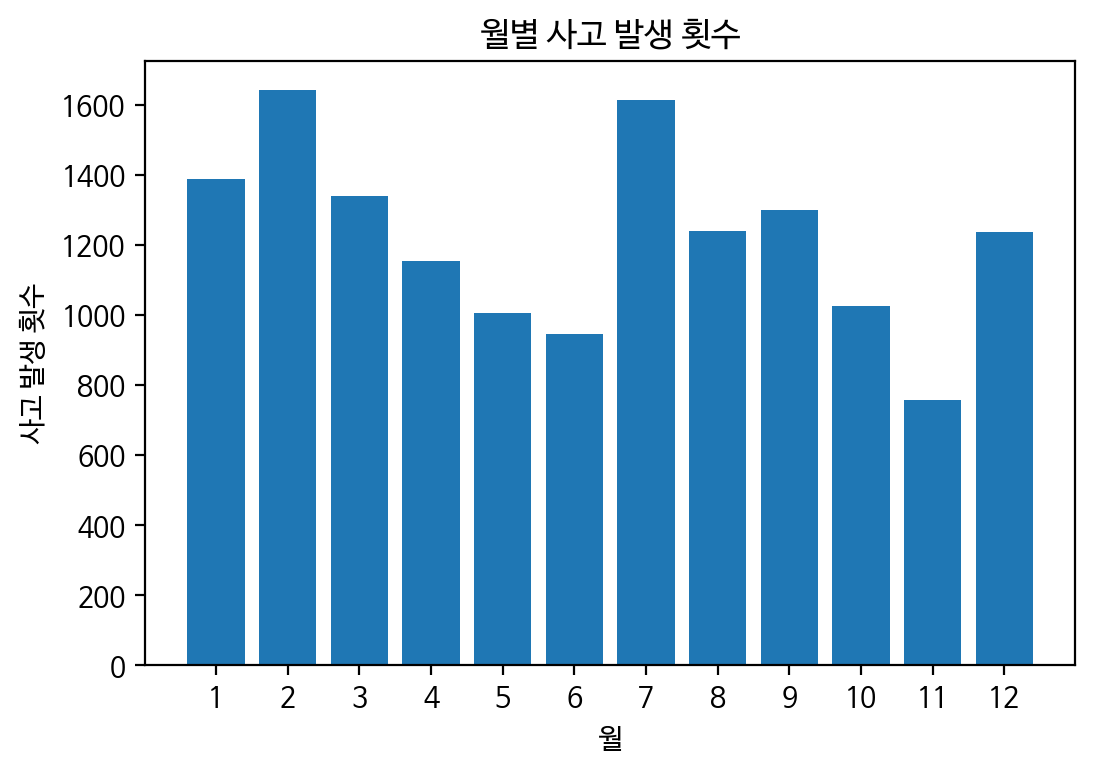

In [ ]:
plt.figure(dpi=200)
plt.title('월별 사고 발생 횟수')
plt.xlabel('월')
plt.ylabel('사고 발생 횟수')
plt.bar(df['해양사고발생(월)'].unique(), df.groupby('해양사고발생(월)').size())
plt.xticks(range(1,13,1))
plt.show()

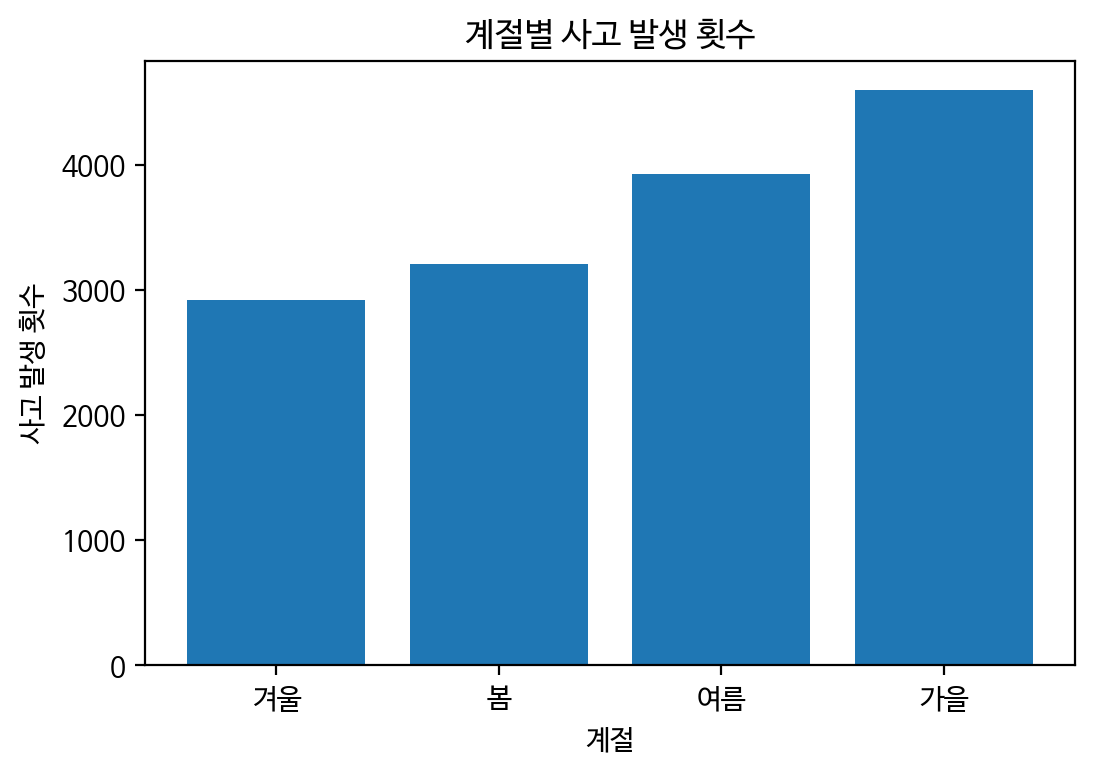

In [ ]:
plt.figure(dpi=200)
plt.title('계절별 사고 발생 횟수')
plt.xlabel('계절')
plt.ylabel('사고 발생 횟수')
plt.bar(df['계절'].unique(), df.groupby('계절').size().sort_values())
plt.xticks(range(0,4,1), labels=['겨울', '봄', '여름', '가을'])
plt.show()

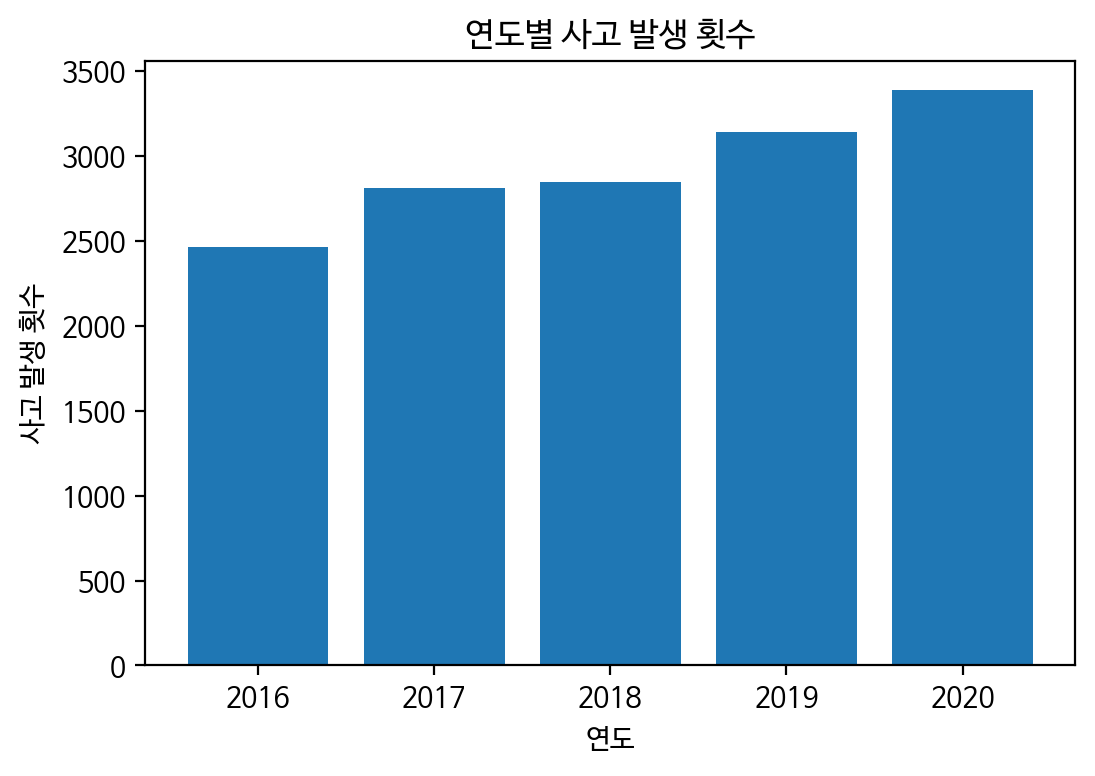

In [ ]:
plt.figure(dpi=200)
plt.title('연도별 사고 발생 횟수')
plt.xlabel('연도')
plt.ylabel('사고 발생 횟수')
plt.bar(df['해양사고발생(년도)'].unique(), df.groupby('해양사고발생(년도)').size())
#plt.xticks(range(0,4,1), labels=['겨울', '봄', '여름', '가을'])
plt.show()

## <strong> 데이터수집 </strong>
## 데이터수집전략

In [ ]:
df2 = pd.read_csv('/content/gdrive/MyDrive/df2.csv', encoding='cp949')

In [ ]:
m = folium.Map(location=[36.377247, 128.067197], zoom_start=7, prefer_canvas=True)

for i in df.groupby('district').mean()[['center_lat', 'center_long']].index:
  folium.Circle(location=df.groupby('district').mean()[['center_lat', 'center_long']].loc[i], radius=float(df.groupby('district').size().loc[i])*50, color='color', fill_color='color', fill_opacity=0.2, line_opcity=0.2, tooltip=int(df.groupby('district').size().loc[i])).add_to(m)

for i in range(len(df2)):
  folium.Circle(location=df2[['lat', 'long']].iloc[i], radius=df2[['2016년', '2017년', '2018년', '2019년']].iloc[i].sum()*2.5, color='#3186cc', fill_color='#3186cc', fill_opacity=0.3, line_opcity=0.3, tooltip=int(df2[['2016년', '2017년', '2018년', '2019년']].iloc[i].sum())).add_to(m)
    
m

In [ ]:
m = folium.Map(location=[36.377247, 128.067197], zoom_start=7, prefer_canvas=True)

for i in df.groupby('district').mean()[['center_lat', 'center_long']].index:
  folium.Circle(location=df.groupby('district').mean()[['center_lat', 'center_long']].loc[i], radius=float(df.groupby('district').size().loc[i])*50, color='color', fill_color='color', fill_opacity=0.2, line_opcity=0.2, tooltip=int(df.groupby('district').size().loc[i])).add_to(m)

for i in df.groupby('district').mean()[['center_lat', 'center_long']].index:
  folium.Circle(location=df.groupby('district').mean()[['center_lat', 'center_long']].loc[i], radius=df.groupby('district').mean()['쓰레기수거량'].loc[i]*150000, color='#3186cc', fill_color='#3186cc', fill_opacity=0.3, line_opcity=0.3, tooltip=df.groupby('district').mean()['쓰레기수거량'].loc[i]).add_to(m)
    
m

In [ ]:
m = folium.Map(location=[36.377247, 128.067197], zoom_start=7, prefer_canvas=True)

for i in df.groupby('district').mean()[['center_lat', 'center_long']].index:
  folium.Circle(location=df.groupby('district').mean()[['center_lat', 'center_long']].loc[i], radius=float(df.groupby('district').size().loc[i])*60, color='color', fill_color='color', fill_opacity=0.2, line_opcity=0.2, tooltip=int(df.groupby('district').size().loc[i])).add_to(m)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
for i in df.groupby('district').mean()[['center_lat', 'center_long']].index:
  folium.Circle(location=df.groupby('district').mean()[['center_lat', 'center_long']].loc[i], radius=df.groupby('district').mean()['최저 수온(°C)'].loc[i]*50000, color=color, fill_color=color, fill_opacity=0.3, line_opcity=0.3, tooltip=df.groupby('district').mean()['최저 수온(°C)'].loc[i]).add_to(m)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
for i in df.groupby('district').mean()[['center_lat', 'center_long']].index:
  folium.Circle(location=df.groupby('district').mean()[['center_lat', 'center_long']].loc[i], radius=df.groupby('district').mean()['T-P( ㎍/L )저층'].loc[i]*50000, color=color, fill_color=color, fill_opacity=0.3, line_opcity=0.3, tooltip=df.groupby('district').mean()['최저 수온(°C)'].loc[i]).add_to(m)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
for i in df.groupby('district').mean()[['center_lat', 'center_long']].index:
  folium.Circle(location=df.groupby('district').mean()[['center_lat', 'center_long']].loc[i], radius=df.groupby('district').mean()['Chl-a(㎍/L)표층'].loc[i]*50000, color=color, fill_color=color, fill_opacity=0.3, line_opcity=0.3, tooltip=df.groupby('district').mean()['규산규소(㎍/L)저층'].loc[i]).add_to(m)


m

## <strong> 구역 별 사고 발생 예측 모델 </strong>
## MLR

In [ ]:
feature = ['쓰레기수거량', '수심','투명도(m)', '암모니아성질소(㎍/L)표층', '암모니아성질소(㎍/L)저층', '아질산성질소(㎍/L)표층',
       '아질산성질소(㎍/L)저층', '질산성질소(㎍/L)표층', '질산성질소(㎍/L)저층', '용존무기질소(㎍/L)표층',
       '용존무기질소(㎍/L)저층', '총질소(㎍/L)표층', '총질소(㎍/L)저층', '용존무기인(㎍/L)표층',
       '용존무기인(㎍/L)저층', '총인(㎍/L)표층', '총인(㎍/L)저층', '규산규소(㎍/L)표층', '규산규소(㎍/L)저층',
       '부유물질(㎎/L)표층', '부유물질(㎎/L)저층', 'NO2-N(㎍/L)표층', 'NO2-N(㎎/L)저층',
       'T-N( ㎍/L )표층', 'T-N( ㎍/L )저층', 'DIP( ㎍/L )표층', 'DIP( ㎍/L )저층',
       'T-P( ㎍/L )표층', 'T-P( ㎍/L )저층', 'SiO2-Si( ㎍/L )표층', 'SiO2-Si( ㎍/L )저층',
       'SS( ㎍/L )표층', 'SS( mg/L )저층', 'Chl-a(㎍/L)표층', 'Chl-a(㎍/L)저층',
       '평균 수온(°C)', '최고 수온(°C)', '최저 수온(°C)',
       '평균 유의 파고(m)', '평균 파고(m)', '최고 유의 파고(m)', '최고 최대 파고(m)', '총 톤 수']

In [ ]:
y

0
district      
0           22
1            8
2           21
3           23
4           23
5           16
6           17
7           54
8           50
9           35
10          41
11           2
12          56
13         176
14         130
15          80
16         154
17         205
18         103
19          56
20          92
21           3
22         445
23         837
24         812
25         714
26         253
27         816
28         296
29         970
30          41
32          12
33          62
34           8
35           3
36           3
37         444
38         201
39         368
40          13
41           2
42           2
46         298
47        1039
48         128
49          32
51         225
52          63
54           1
55           6
56         922
57        1039
58          80
59           4
61          21
62         265
63         212
64         328
65         552
66        1056
67          31
68           5
69           3
71          10
72          29
73          86
74         113
75         137
76          89
78           1
81           7
82          62
83          21
84          16
85          24
86           7
88           5
91           7
92          15
93          16
94           6
95          21

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


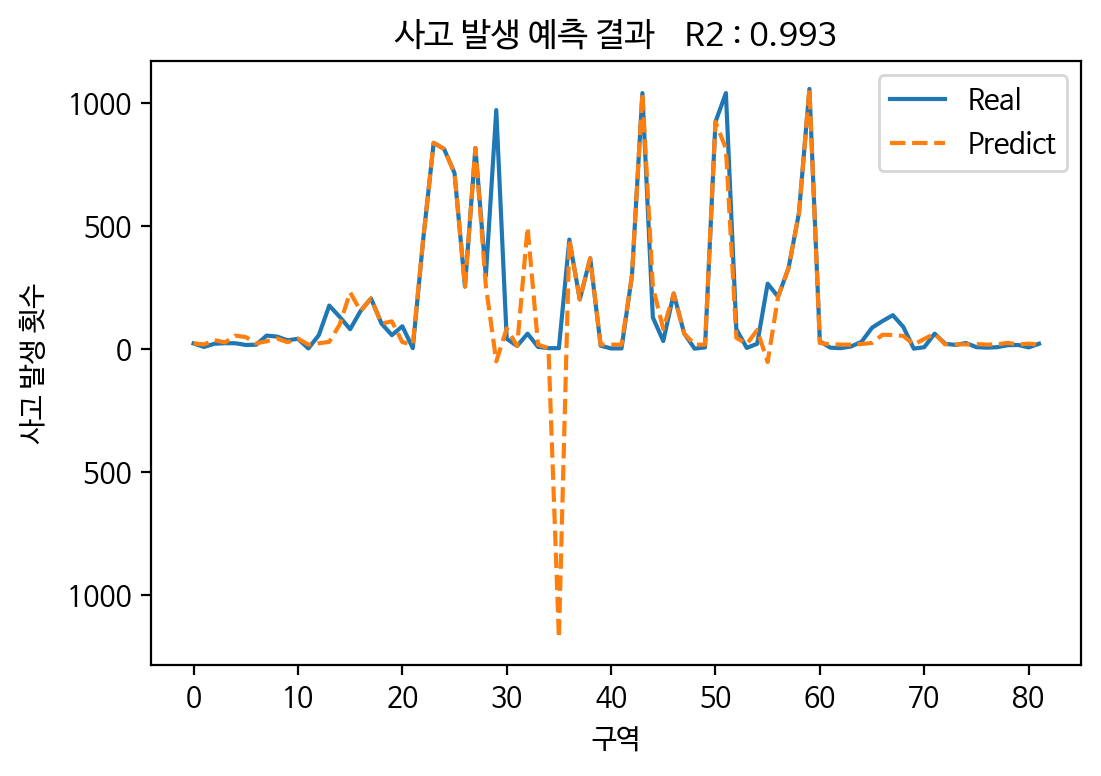

In [ ]:
X = df.groupby(['district']).mean()[feature].fillna(0)
y = pd.DataFrame(df.groupby(['district']).size())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)
R2 = mlr.score(X_train, y_train)

plt.figure(dpi=200)
plt.title('사고 발생 예측 결과    R2 : ' + str(R2)[:5])
plt.xlabel('구역')
plt.ylabel('사고 발생 횟수')
plt.plot(np.array(y[0]), label = 'Real')
plt.plot(mlr.predict(X), '--', label = 'Predict')
plt.legend()
plt.show()

In [ ]:
corr = df.groupby(['district']).mean()[feature].fillna(0)
corr['사고 발생 횟수'] = pd.DataFrame(df.groupby(['district']).size())
#pd.DataFrame(corr.corr(method='pearson').sort_values(by=['사고 발생 횟수'], axis=0, ascending=False)['사고 발생 횟수'])

## MLP

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


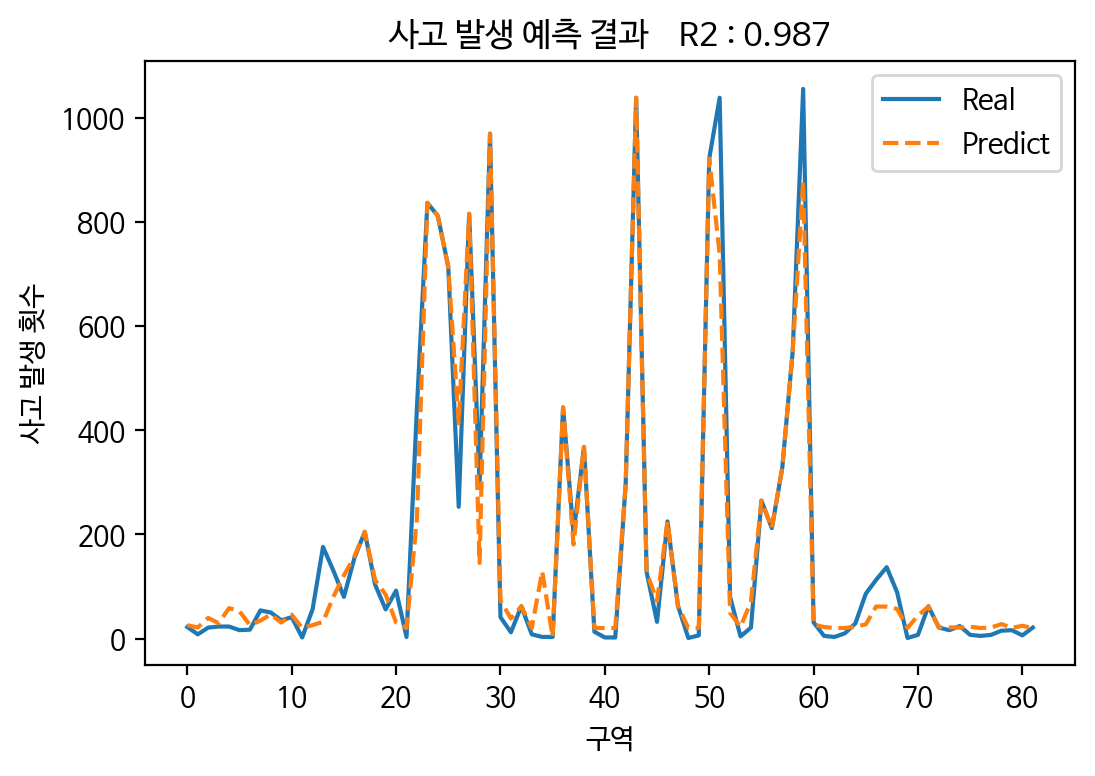

In [ ]:
X = df.groupby(['district']).mean()[feature].fillna(0)
y = pd.DataFrame(df.groupby(['district']).size())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

mlp = MLPRegressor(max_iter=10000, hidden_layer_sizes=200, learning_rate_init=0.001).fit(X_train, y_train)
#mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
R2 = mlp.score(X_train, y_train)

plt.figure(dpi=200)
plt.title('사고 발생 예측 결과    R2 : ' + str(R2)[:5])
plt.xlabel('구역')
plt.ylabel('사고 발생 횟수')
plt.plot(np.array(y[0]), label = 'Real')
plt.plot(mlp.predict(X), '--', label = 'Predict')
plt.legend()
plt.show()

## SVR

In [ ]:
# X = df.groupby(['district']).mean()[feature].fillna(0)
# y = pd.DataFrame(df.groupby(['district']).size())

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)


# param_distribs = {
#     'kernel' : ['linear', 'rbf'],
#     'C' : reciprocal(20,200000),
#     'gamma' : expon(scale=1.0)
# }

# svm_reg = SVR()

# random_search = RandomizedSearchCV(svm_reg, param_distributions = param_distribs, n_iter = 50, cv = 5, scoring = 'neg_mean_squared_error',
#                                    verbose = 3, random_state = 42)

# random_search.fit(X_train, y_train)

In [ ]:
random_search.best_params_

NameError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


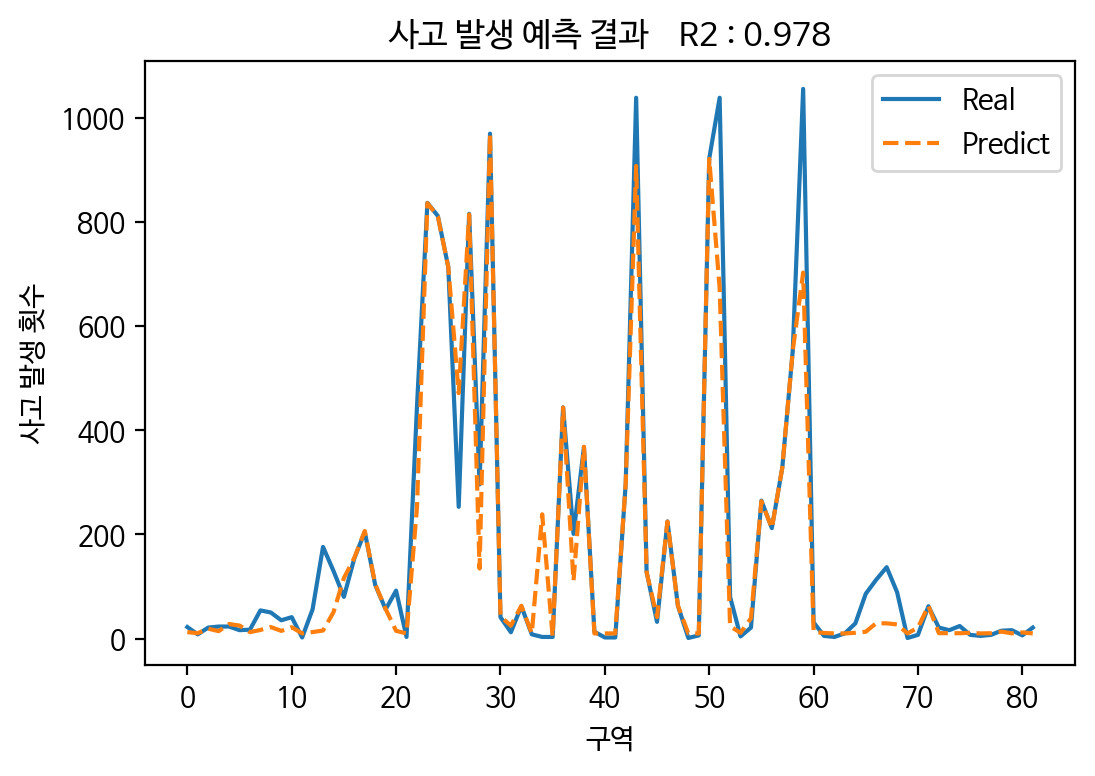

In [ ]:
svr = SVR(kernel='rbf',  gamma=0.15023452872733867, epsilon=0.5, C=5603.270317432516, tol=3.0).fit(X_train, y_train)
y_pred = svr.predict(X_test)
R2 = svr.score(X_train, y_train)

plt.figure(dpi=200)
plt.title('사고 발생 예측 결과    R2 : ' + str(R2)[:5])
plt.xlabel('구역')
plt.ylabel('사고 발생 횟수')
plt.plot(np.array(y[0]), label = 'Real')
plt.plot(svr.predict(X), '--', label = 'Predict')
plt.legend()
plt.show()

## <strong> 연도별, 월별, 구역별 사고 발생 예측 모델 </strong>

## MLR

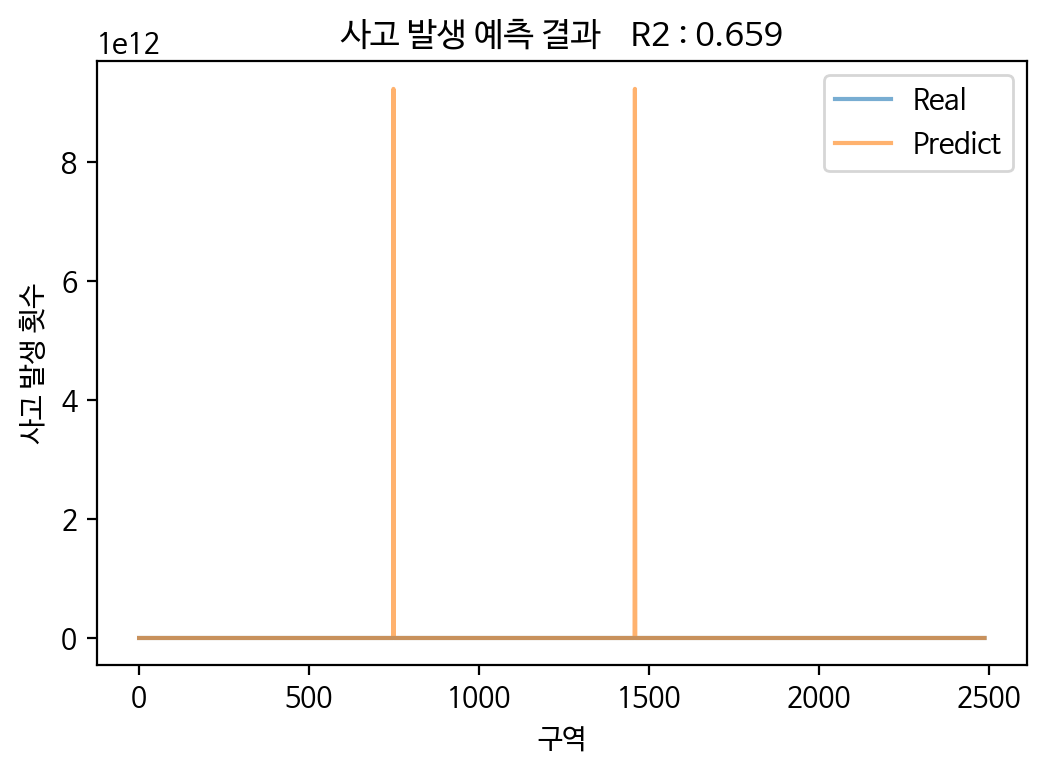

In [ ]:
X = df.groupby(['해양사고발생(년도)', '해양사고발생(월)', 'district']).mean()[feature].fillna(0)
y = pd.DataFrame(df.groupby(['해양사고발생(년도)', '해양사고발생(월)', 'district']).size())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)
R2 = mlr.score(X_train, y_train)

plt.figure(dpi=200)
plt.title('사고 발생 예측 결과    R2 : ' + str(R2)[:5])
plt.xlabel('구역')
plt.ylabel('사고 발생 횟수')
plt.plot(np.array(y[0]), alpha = 0.6, label = 'Real')
plt.plot(mlr.predict(X), alpha = 0.6, label = 'Predict')
plt.legend()
plt.show()

In [ ]:
X['사고 발생 횟수'] = y
X

X.to_csv('df123.csv',encoding='cp949')
!cp data.csv "drive/My Drive/"

cp: cannot stat 'data.csv': No such file or directory


## MLP

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


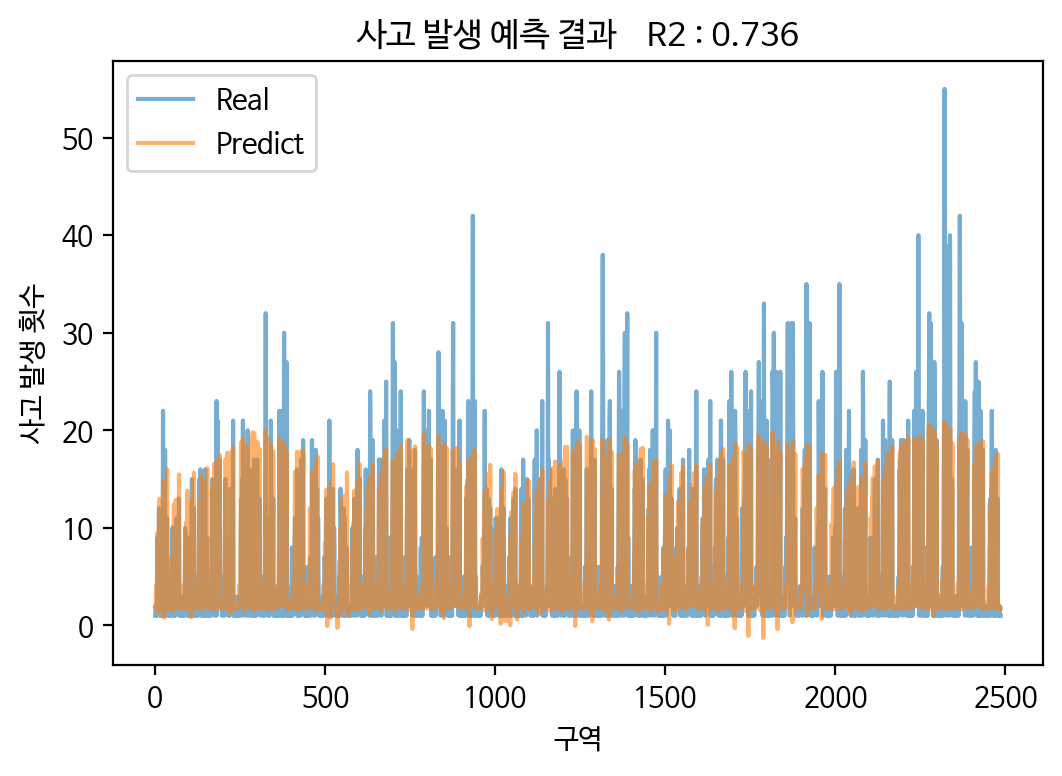

In [ ]:
X = df.groupby(['해양사고발생(년도)', '해양사고발생(월)', 'district']).mean()[feature].fillna(0)
y = pd.DataFrame(df.groupby(['해양사고발생(년도)', '해양사고발생(월)', 'district']).size())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

mlp = MLPRegressor(max_iter=10000, hidden_layer_sizes=200, learning_rate_init=0.001).fit(X_train, y_train)
#mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
R2 = mlp.score(X_train, y_train)

plt.figure(dpi=200)
plt.title('사고 발생 예측 결과    R2 : ' + str(R2)[:5])
plt.xlabel('구역')
plt.ylabel('사고 발생 횟수')
plt.plot(np.array(y[0]), alpha = 0.6, label = 'Real')
plt.plot(mlp.predict(X), alpha = 0.6, label = 'Predict')
plt.legend()
plt.show()

## SVR

In [ ]:
# X = df.groupby(['해양사고발생(년도)', '해양사고발생(월)', 'district']).mean()[feature].fillna(0)
# y = pd.DataFrame(df.groupby(['해양사고발생(년도)', '해양사고발생(월)', 'district']).size())

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)


# param_distribs = {
#     'kernel' : ['linear', 'rbf'],
#     'C' : reciprocal(20,200000),
#     'gamma' : expon(scale=1.0)
# }

# svm_reg = SVR()

# random_search = RandomizedSearchCV(svm_reg, param_distributions = param_distribs, n_iter = 50, cv = 2, scoring = 'neg_mean_squared_error',
#                                    verbose = 3, random_state = 42)

# random_search.fit(X_train, y_train.values.ravel())

In [ ]:
random_search.best_params_

NameError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


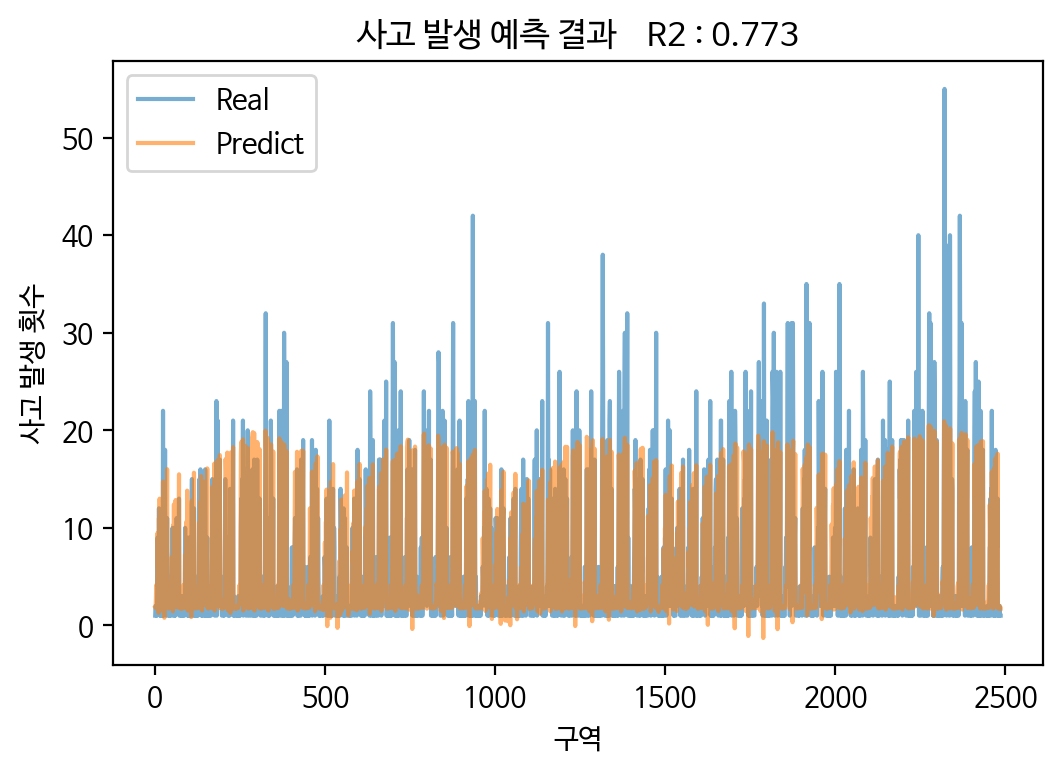

In [ ]:
X = df.groupby(['해양사고발생(년도)', '해양사고발생(월)', 'district']).mean()[feature].fillna(0)
y = pd.DataFrame(df.groupby(['해양사고발생(년도)', '해양사고발생(월)', 'district']).size())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)


svr = SVR(kernel='rbf',  gamma=0.15023452872733867, epsilon=0.5, C=5603.270317432516, tol=3.0).fit(X_train, y_train)
y_pred = svr.predict(X_test)
R2 = svr.score(X_train, y_train)

plt.figure(dpi=200)
plt.title('사고 발생 예측 결과    R2 : ' + str(R2)[:5])
plt.xlabel('구역')
plt.ylabel('사고 발생 횟수')
plt.plot(np.array(y[0]), alpha = 0.6, label = 'Real')
plt.plot(mlp.predict(X), alpha = 0.6, label = 'Predict')
plt.legend()
plt.show()

### 내가한거 


In [ ]:
from lightgbm import LGBMClassifier, plot_importance

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


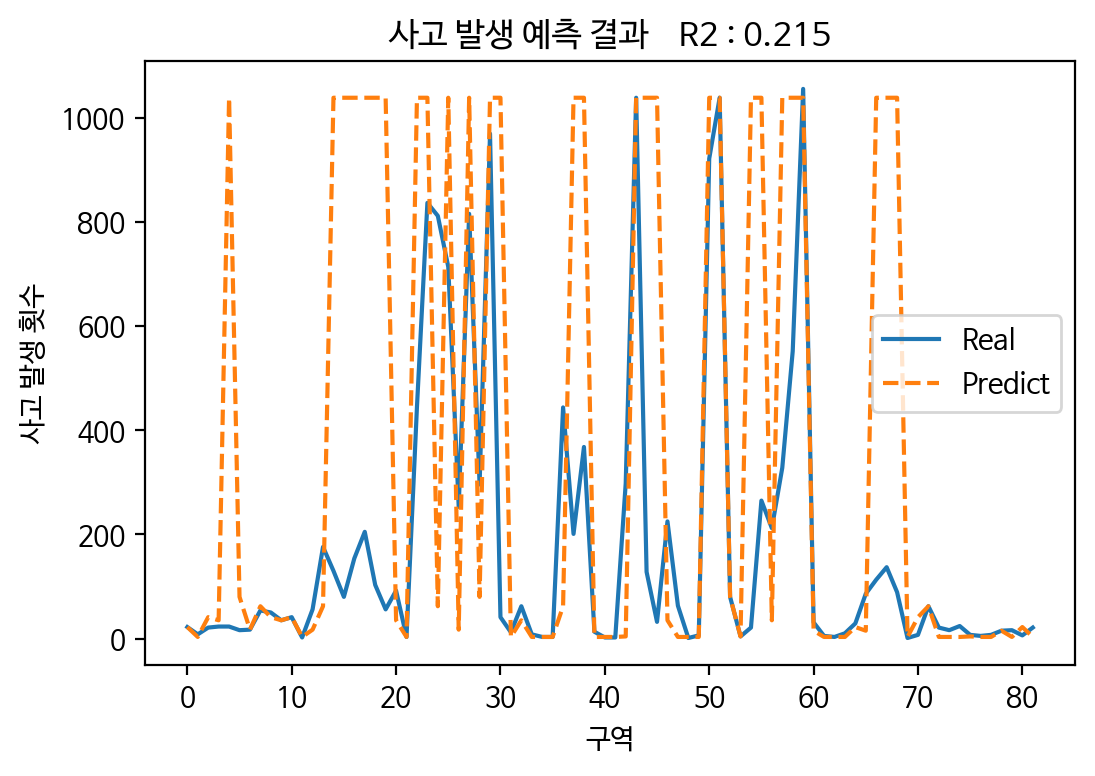

In [ ]:
X = df.groupby(['district']).mean()[feature].fillna(0)
y = pd.DataFrame(df.groupby(['district']).size())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

mlr = LGBMClassifier(n_estimators=1000)
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)
R2 = mlr.score(X_train, y_train)

plt.figure(dpi=200)
plt.title('사고 발생 예측 결과    R2 : ' + str(R2)[:5])
plt.xlabel('구역')
plt.ylabel('사고 발생 횟수')
plt.plot(np.array(y[0]), label = 'Real')
plt.plot(mlr.predict(X), '--', label = 'Predict')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
X = df.groupby(['district']).mean()[feature].fillna(0)
y = pd.DataFrame(df.groupby(['district']).size())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

mlr = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
#mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)
R2 = mlr.score(X_train, y_train)

plt.figure(dpi=200)
plt.title('사고 발생 예측 결과    R2 : ' + str(R2)[:5])
plt.xlabel('구역')
plt.ylabel('사고 발생 횟수')
plt.plot(np.array(y[0]), label = 'Real')
plt.plot(mlr.predict(X), '--', label = 'Predict')
plt.legend()
plt.show()

AttributeError: ignored